In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from skimage.color import rgb2lab, lab2rgb
from skimage.io import imread, imshow
import keras.backend as K

from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
BATCH_SIZE = 1
NUM_EPOCHS = 40
IMAGE_SIZE = (256, 256)

In [3]:
train_dir = './dataset/train'
train_dataset = image_dataset_from_directory(train_dir, label_mode=None, shuffle=False, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

validation_dir = './dataset/validation'
validation_dataset = image_dataset_from_directory(validation_dir, label_mode=None, shuffle=False, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

test_dir = './dataset/test'
test_dataset = image_dataset_from_directory(test_dir, label_mode=None, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)

Found 26 files belonging to 1 classes.
Found 14 files belonging to 1 classes.
Found 25 files belonging to 1 classes.


(1, 256, 256, 3)


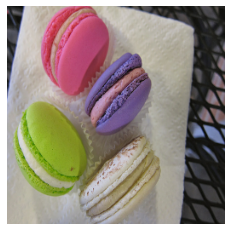

In [4]:
for images in train_dataset.take(1):
    print(images.shape)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [6]:
from model import ImageColorizationModel
from freeze import Freezer
model = ImageColorizationModel().model()
freezer = Freezer(model)


In [7]:
model.load_weights('convertedWeights.h5', by_name=True)
freezer.freeze_layers_old()

In [8]:
delta = 1
def l_delta_loss(y_true, y_pred):
    smaller = K.cast(K.abs(y_true - y_pred) < delta, tf.float32)
    bigger = 1 - smaller
    loss = K.sum(smaller * K.square(y_true - y_pred)) / 2 + delta * K.sum(bigger * (K.abs(y_true - y_pred) - (delta / 2)))
    return loss
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303

In [9]:
base_learning_rate = 0.0001
model.compile(loss=l_delta_loss,
              optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
bw_conv1_1 (Conv2D)             (None, 256, 256, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
ab_conv1_1 (Conv2D)             (None, 256, 256, 64) 1792        input_1[0][0]                    
_______________________________________________________________________________________

In [11]:
from utils.data_generator import DataGenerator

In [12]:
train_generator = DataGenerator(batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, image_dataset=train_dataset)
validation_generator = DataGenerator(batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, image_dataset=validation_dataset)

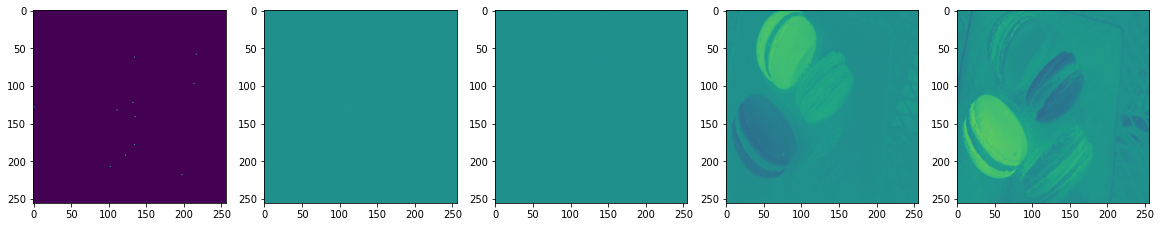

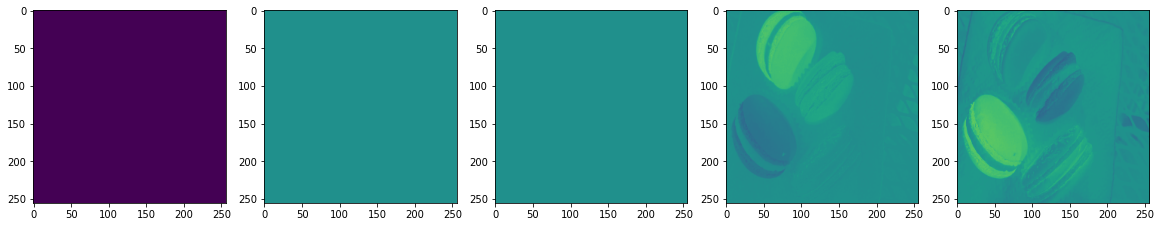

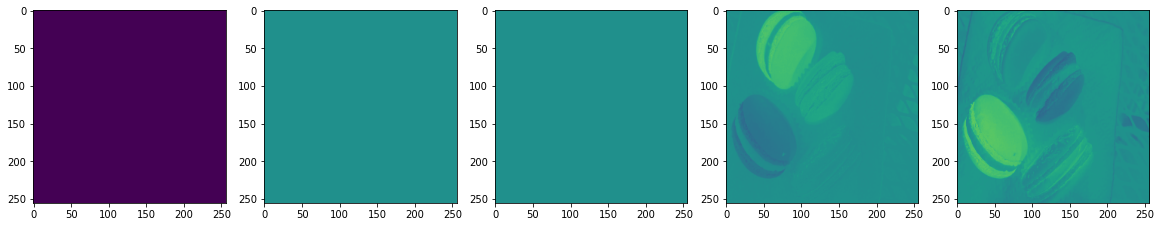

([array([[[[0.15724489],
           [0.1316619 ],
           [0.11515953],
           ...,
           [0.13222462],
           [0.11857622],
           [0.1162389 ]],
  
          [[0.14437214],
           [0.12870742],
           [0.12209745],
           ...,
           [0.14010707],
           [0.13504197],
           [0.12022276]],
  
          [[0.18609554],
           [0.13081987],
           [0.11758511],
           ...,
           [0.12407883],
           [0.12851067],
           [0.12085646]],
  
          ...,
  
          [[0.7178378 ],
           [0.70984113],
           [0.7189783 ],
           ...,
           [0.23491329],
           [0.24880996],
           [0.25072494]],
  
          [[0.7123253 ],
           [0.71789706],
           [0.7276298 ],
           ...,
           [0.24772492],
           [0.25291106],
           [0.25777972]],
  
          [[0.7143995 ],
           [0.73443353],
           [0.7240193 ],
           ...,
           [0.1979052 ],
           [0.21

In [13]:
train_generator.__getitem__(0)
train_generator.__getitem__(0)
train_generator.__getitem__(0)


In [14]:
train_generator.__len__()

1

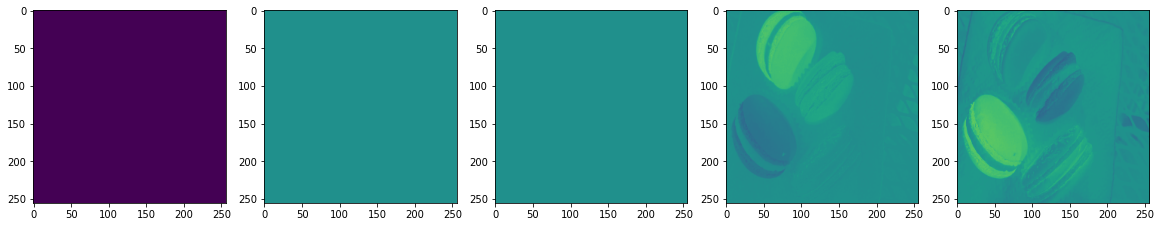

Epoch 1/40


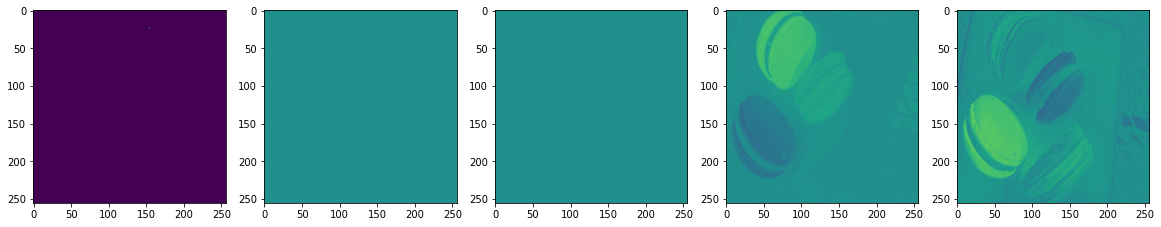

1/1 [==============================] - ETA: 0s - loss: 11594.7754 - accuracy: 0.4986

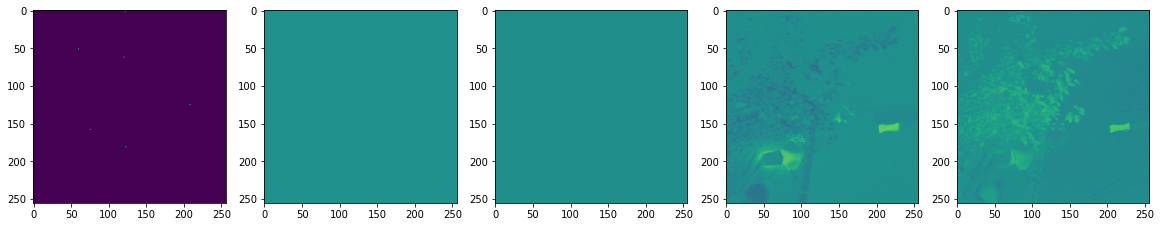

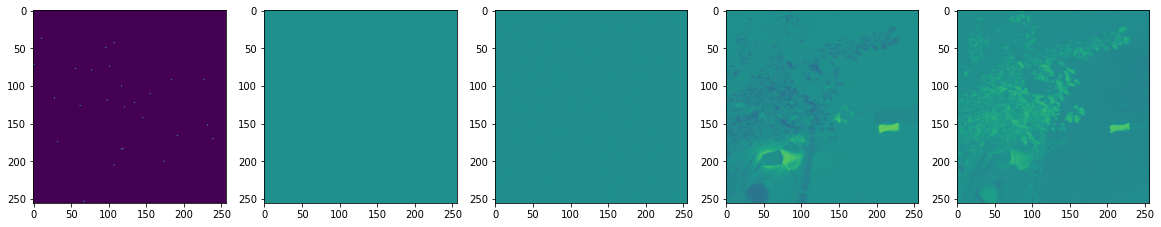

1/1 [==============================] - 3s 3s/step - loss: 11594.7754 - accuracy: 0.4986 - val_loss: 65845.1406 - val_accuracy: 0.5600
Epoch 2/40


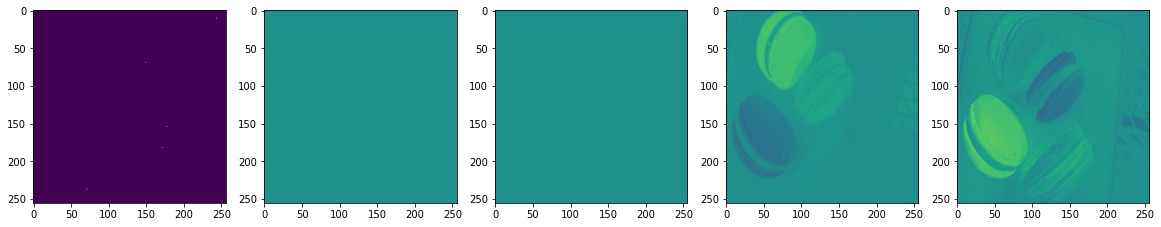

1/1 [==============================] - ETA: 0s - loss: 9800.8604 - accuracy: 0.5156

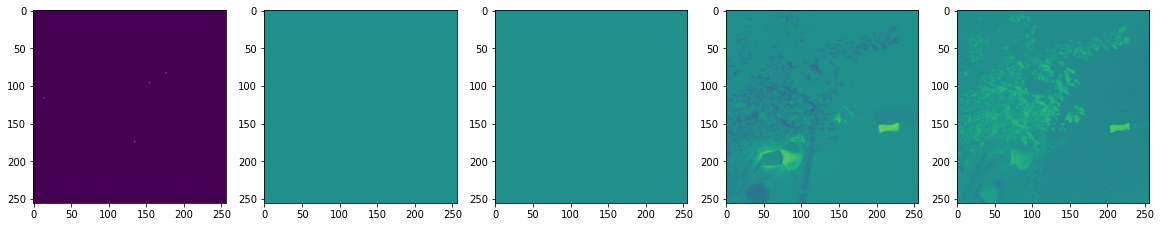

1/1 [==============================] - 2s 2s/step - loss: 9800.8604 - accuracy: 0.5156 - val_loss: 65625.2656 - val_accuracy: 0.5679
Epoch 3/40


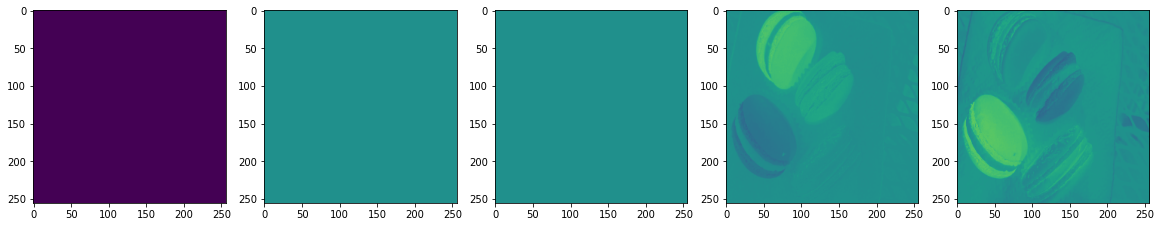

1/1 [==============================] - ETA: 0s - loss: 26295.9766 - accuracy: 0.5089

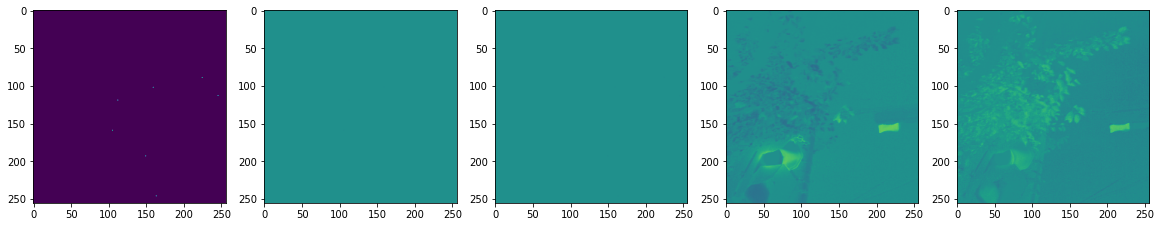

1/1 [==============================] - 4s 4s/step - loss: 26295.9766 - accuracy: 0.5089 - val_loss: 65117.0312 - val_accuracy: 0.5664
Epoch 4/40


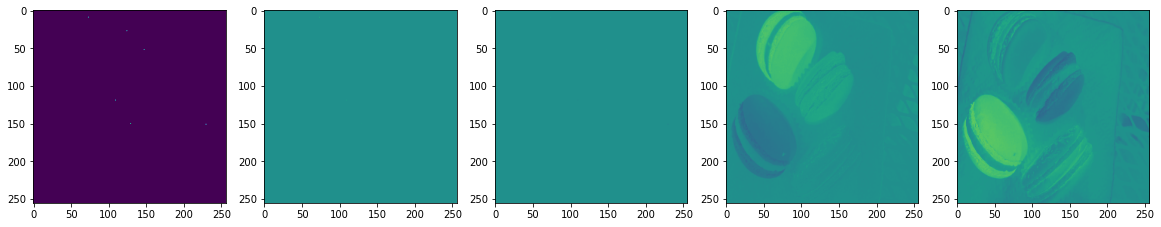

1/1 [==============================] - ETA: 0s - loss: 7312.4272 - accuracy: 0.5553

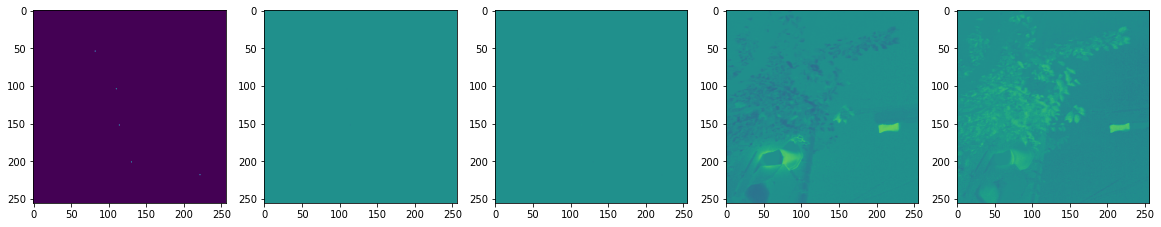

1/1 [==============================] - 2s 2s/step - loss: 7312.4272 - accuracy: 0.5553 - val_loss: 64687.2305 - val_accuracy: 0.5733
Epoch 5/40


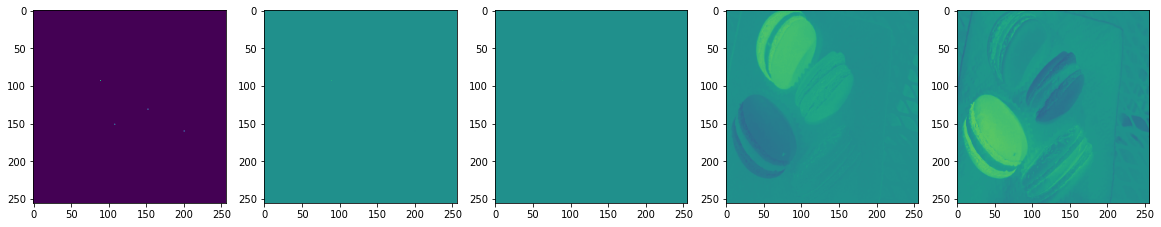

1/1 [==============================] - ETA: 0s - loss: 6333.5928 - accuracy: 0.5492

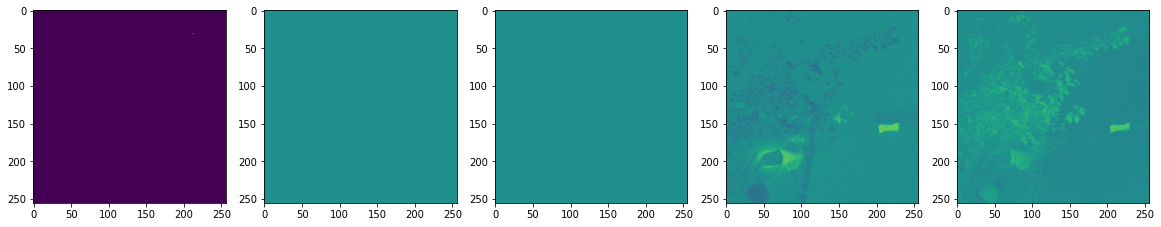

1/1 [==============================] - 2s 2s/step - loss: 6333.5928 - accuracy: 0.5492 - val_loss: 64050.0195 - val_accuracy: 0.5747
Epoch 6/40


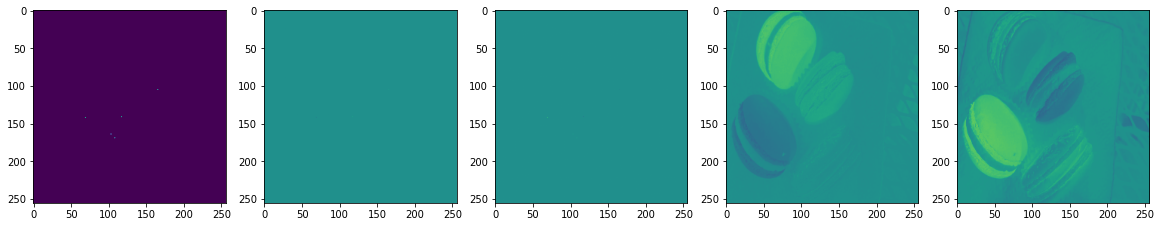

1/1 [==============================] - ETA: 0s - loss: 5978.8574 - accuracy: 0.5368

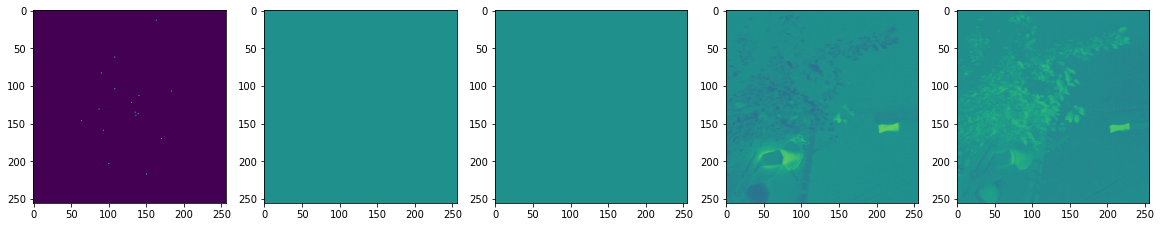

1/1 [==============================] - 2s 2s/step - loss: 5978.8574 - accuracy: 0.5368 - val_loss: 62153.1797 - val_accuracy: 0.5543
Epoch 7/40


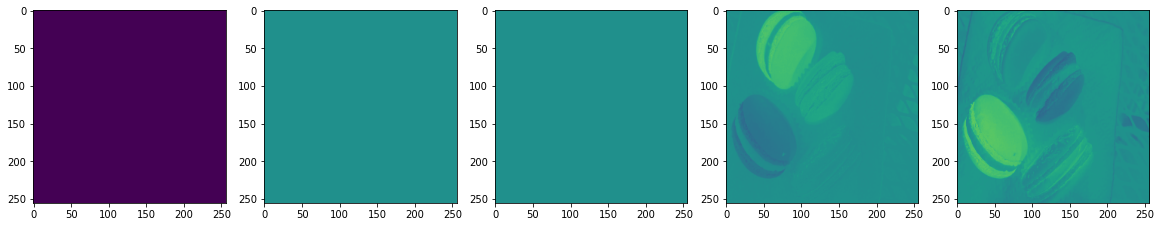

In [ ]:
history = model.fit(train_generator, epochs=NUM_EPOCHS, validation_data=validation_generator)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('L-delta Loss')
plt.ylim([0, max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_generator = DataGenerator(batch_size=BATCH_SIZE, image_size=IMAGE_SIZE, image_dataset=test_dataset)
test_batch = test_generator.__getitem__(0)
# do your magic vanka

In [ ]:
# test_batch[0][1][0] = np.zeros((256, 256, 3))

predictions = model.predict_on_batch(test_batch)

In [ ]:
print(test_batch[0][0].shape)
final_image = np.dstack((test_batch[0][0][0] * 100, predictions[0] * 128))
original_image = np.dstack((test_batch[0][0][0] * 100, test_batch[1][0] * 128))
print(original_image.shape)
print(np.amin(predictions[0] * 128), np.amax(predictions[0] * 128))
print(np.amin( test_batch[1][0] * 128), np.amax( test_batch[1][0] * 128))
print(np.sum((final_image-original_image)))

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(12, 4))
imshow(lab2rgb(final_image), ax=ax0), ax0.set_title('Final image'), ax0.axis('off')
imshow(lab2rgb(original_image), ax=ax1), ax1.set_title('Original image'), ax1.axis('off')
plt.show()

In [ ]:
plt.imshow(test_batch[0][1][0][:, :, 0])
plt.show()

In [ ]:
PSNR(original_image, final_image)